<a href="https://colab.research.google.com/github/TomasMendozaHN/ICDF_Class/blob/main/05112022_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir ~/.kaggle #mkdir = make directory
!cp kaggle.json ~/.kaggle/  # cp = copy
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231

404 - Not Found


In [12]:
!unzip stock-time-series-20050101-to-20171231.zip

Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: KO_2006-01-01_to_2018-01-01.csv  
  inflating: MCD_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_20

In [14]:
import numpy as np
import pandas as pd

In [23]:
import os
for filename in os.listdir():
  if filename.endswith('.csv'):
    print(filename)

VZ_2006-01-01_to_2018-01-01.csv
NKE_2006-01-01_to_2018-01-01.csv
CAT_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv
GE_2006-01-01_to_2018-01-01.csv
JPM_2006-01-01_to_2018-01-01.csv
KO_2006-01-01_to_2018-01-01.csv
UNH_2006-01-01_to_2018-01-01.csv
JNJ_2006-01-01_to_2018-01-01.csv
WMT_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv
UTX_2006-01-01_to_2018-01-01.csv
MMM_2006-01-01_to_2018-01-01.csv
TRV_2006-01-01_to_2018-01-01.csv
CSCO_2006-01-01_to_2018-01-01.csv
IBM_2006-01-01_to_2018-01-01.csv
XOM_2006-01-01_to_2018-01-01.csv
MRK_2006-01-01_to_2018-01-01.csv
PFE_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv
INTC_2006-01-01_to_2018-01-01.csv
MSFT_2006-01-01_to_2018-01-01.csv
AXP_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv
GOOGL_2006-01-01_to_2018-01-01.csv
MCD_2006-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.csv
AABA_2006-01-01_to_2018-01-01.csv
PG_2006-01-01_to_2018-01-01.csv
AA

In [24]:
filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data = pd.read_csv(filepath)
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


# Visualize Amazon's Stock Price

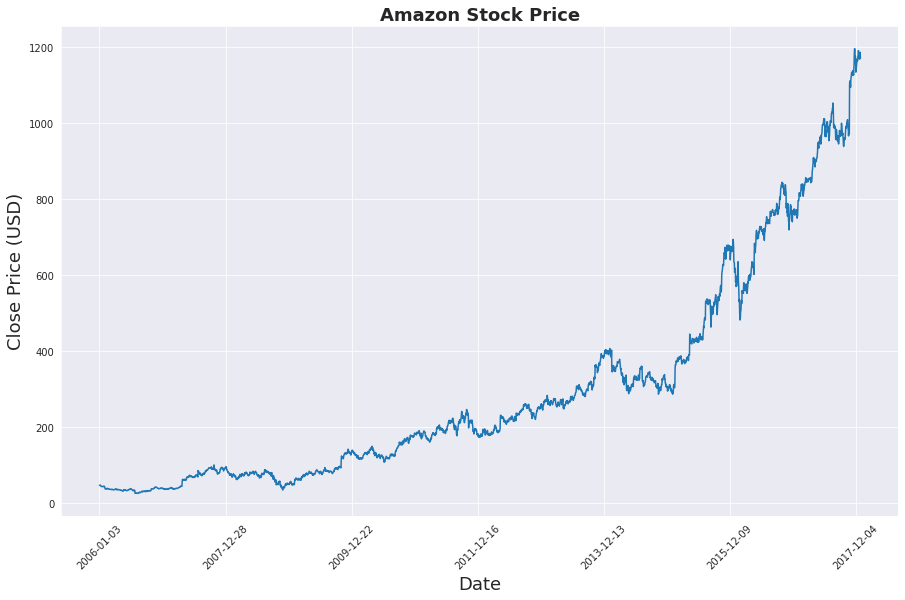

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [26]:
price = data[['Close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [ ]:
price['Close']

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
price['Close']

0      -0.963223
1      -0.963787
2      -0.963104
3      -0.962727
4      -0.964078
          ...   
3014    0.953033
3015    0.967395
3016    0.976799
3017    0.983364
3018    0.954931
Name: Close, Length: 3019, dtype: float64